In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# 1. Load the Dataset

In [2]:
(X_train_all, y_train_all), (X_test, y_test) = keras.datasets.mnist.load_data()

X_valid, y_valid = X_train_all[:10000], y_train_all[:10000] # validation set
X_train, y_train = X_train_all[10000:], y_train_all[10000:] # training set

classes = np.unique(y_train)

In [3]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_valid shape:', X_valid.shape)
print('y_valid shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('image size:', X_train[0].shape)
print('classes:', len(classes))

X_train shape: (50000, 28, 28)
y_train shape: (50000,)
X_valid shape: (10000, 28, 28)
y_valid shape: (50000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
image size: (28, 28)
classes: 10


50000 training samples, 10000 validation samples, and 10000 test samples. 10 classes. 

Let's view an image.

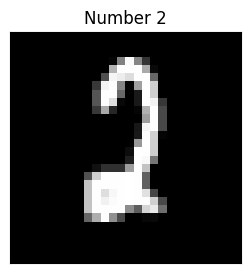

In [4]:
i = 100
example_x, example_y  = X_train[i], y_train[i]
                                            
plt.figure(figsize=(3,3))                   
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(example_x, cmap='gray')
plt.title('Number {label}'.format(label=example_y));

Reshape the train, validation, and test sets. 

In [5]:
# reshape
X_train = X_train.reshape(len(X_train), -1)
X_valid = X_valid.reshape(len(X_valid), -1)
X_test = X_test.reshape(len(X_test), -1)

Normalize pixel values between 0 and 1.

In [6]:
# normalize
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

Convert integer labels to one-hot encoded vectors.

In [7]:
# one-hot encoding
y_train_onehot = keras.utils.to_categorical(y_train)
y_valid_onehot = keras.utils.to_categorical(y_valid)
y_test_onehot = keras.utils.to_categorical(y_test)

# 2. Build the model

In [8]:
# set up the layers 
model = keras.Sequential()

# build the model
model.add(keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10,  activation="softmax"))

# display the model summary
model.summary()

/Users/liusiqi/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# compile the model 
model.compile(optimizer="rmsprop", 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [10]:
# train the model 
history = model.fit(X_train, y_train_onehot, epochs=21, batch_size=64, validation_data=(X_valid, y_valid_onehot))

Epoch 1/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8597 - loss: 0.4872 - val_accuracy: 0.9527 - val_loss: 0.1559
Epoch 2/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9607 - loss: 0.1282 - val_accuracy: 0.9590 - val_loss: 0.1375
Epoch 3/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9731 - loss: 0.0872 - val_accuracy: 0.9728 - val_loss: 0.0893
Epoch 4/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9814 - loss: 0.0617 - val_accuracy: 0.9745 - val_loss: 0.0879
Epoch 5/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9845 - loss: 0.0486 - val_accuracy: 0.9696 - val_loss: 0.1069
Epoch 6/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9868 - loss: 0.0421 - val_accuracy: 0.9779 - val_loss: 0.0852
Epoch 7/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9904 - loss: 0.0333 - val_accuracy: 0.9691 - val_loss: 0.1197
Epoch 8/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9913 - loss: 0.0270 - val_accuracy: 0.

## 2.1. Plot the Training Results

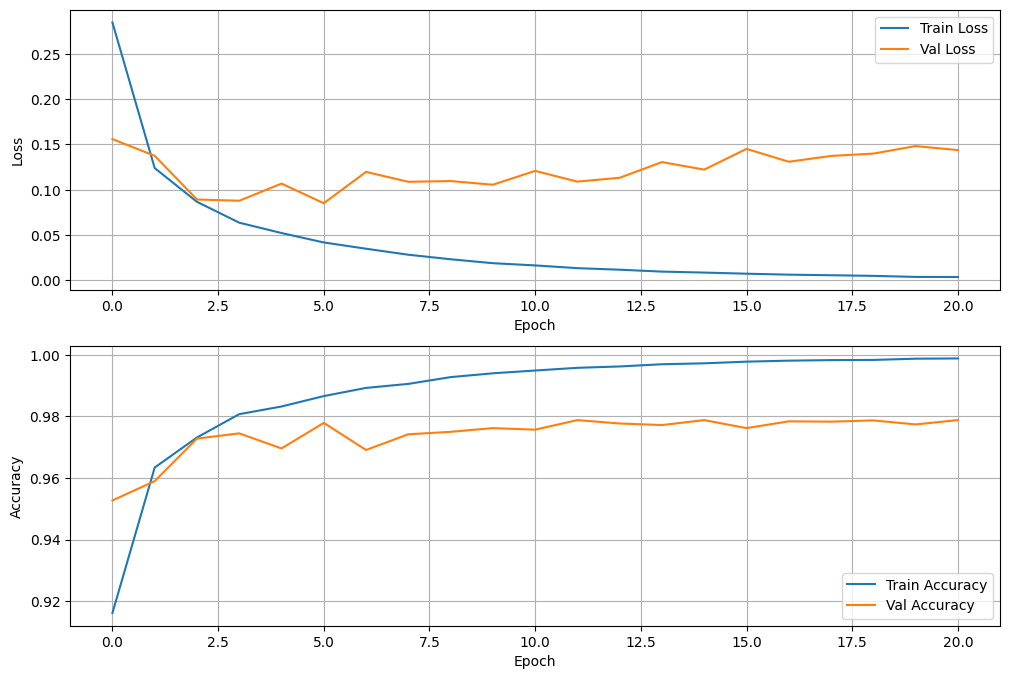

In [11]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Val Loss'], loc='upper right')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Val Accuracy'], loc='lower right')
plt.grid(True);

## 2.2 Prediction

In [12]:
y_test_pred = model.predict(X_test, verbose=0)
y_test_pred_label = np.argmax(y_test_pred, axis=1)

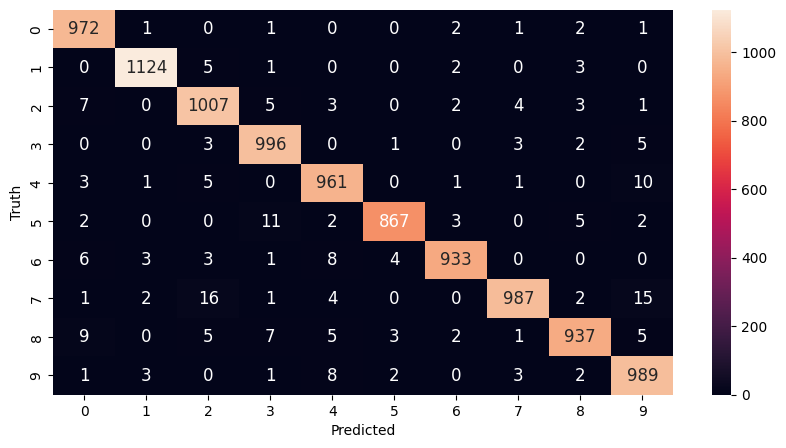

In [13]:
# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_test_pred_label)

plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size':12})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()